# 전복 나이 예측

## 1. Import

In [1]:
import pandas as pd
import numpy as np

## 2. 데이터 읽기 및 전처리

In [2]:
df = pd.read_csv('data/abalone.csv')

In [3]:
df = pd.read_csv('data/abalone.csv', 
        names=['sex', 'tall', 'radius', 'height', 'weg1', 'weg2', 'weg3', 'weg4', 'ring_cnt'])
df

,sex,tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   tall      4177 non-null   float64
 2   radius    4177 non-null   float64
 3   height    4177 non-null   float64
 4   weg1      4177 non-null   float64
 5   weg2      4177 non-null   float64
 6   weg3      4177 non-null   float64
 7   weg4      4177 non-null   float64
 8   ring_cnt  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
target_data = df[['ring_cnt']]
input_data = df.drop('ring_cnt', axis=1)

In [7]:
target_data

,ring_cnt
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [8]:
input_data

,sex,tall,radius,height,weg1,weg2,weg3,weg4
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


### 상관관계

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

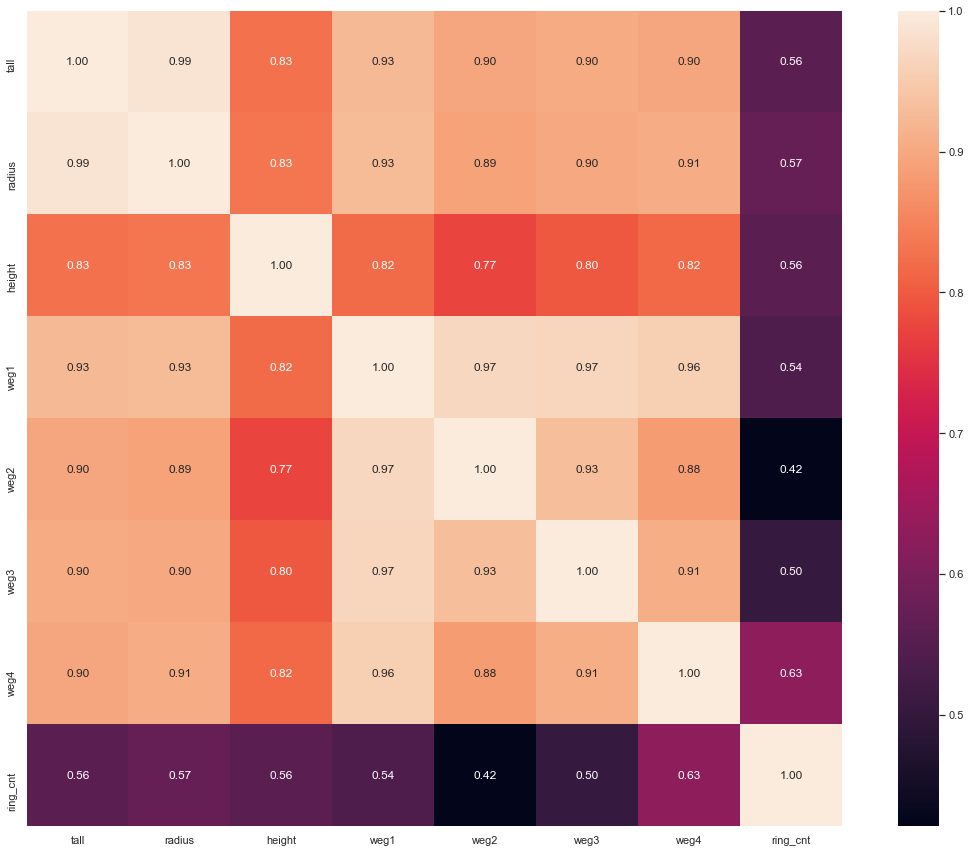

In [10]:
plt.figure(figsize=(20,15)) # 사이즈 정하기
sns.heatmap(df.corr(), annot=True, fmt = '.2f', square = True)
plt.show()

In [11]:
df.corr()

,tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
tall,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
radius,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
weg1,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
weg2,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
weg3,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
weg4,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
ring_cnt,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### 시각화

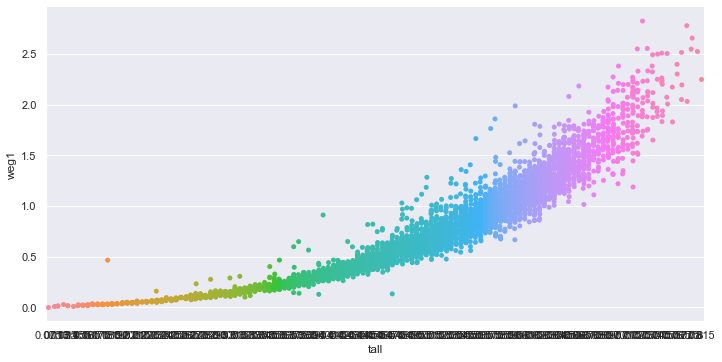

In [12]:
sns.catplot(data=df, x='tall', y='weg1', aspect=2)

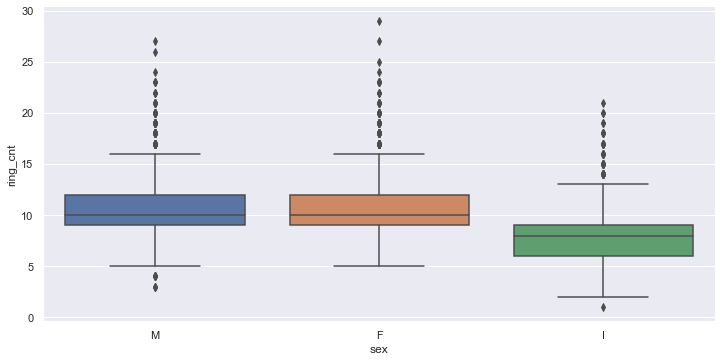

In [13]:
# boxplot
sns.catplot(kind='box', data=df, x='sex', y='ring_cnt', aspect=2)

### 원핫인코딩
#### 성별은 범주형 변수이므로, 수치값으로 변환

In [14]:
from sklearn.preprocessing import OneHotEncoder
data_cat = input_data[['sex']]
onehot_encoder = OneHotEncoder()
data_cat_onehot = onehot_encoder.fit_transform(data_cat)
print(onehot_encoder.categories)

auto


In [15]:
input_data = input_data.drop("sex", axis=1)

In [16]:
data = np.c_[data_cat_onehot.toarray(), input_data, target_data] # 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [17]:
data = pd.DataFrame(data, columns=['sex_F', 'sex_I', 'sex_M', 'sex_''tall', 'radius', 'height', 'weg1', 'weg2', 'weg3', 'weg4', 'ring_cnt'])

In [18]:
data

,sex_F,sex_I,sex_M,sex_tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [19]:
target_data = data[['ring_cnt']]
input_data = data.drop('ring_cnt', axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

In [21]:
x_train

,sex_F,sex_I,sex_M,sex_tall,radius,height,weg1,weg2,weg3,weg4
3550,0.0,0.0,1.0,0.505,0.390,0.115,0.5585,0.2575,0.1190,0.1535
4044,1.0,0.0,0.0,0.580,0.425,0.155,0.8730,0.3615,0.2490,0.2390
2167,1.0,0.0,0.0,0.370,0.275,0.085,0.2405,0.1040,0.0535,0.0700
959,0.0,0.0,1.0,0.500,0.385,0.135,0.6425,0.3195,0.1290,0.1535
251,0.0,0.0,1.0,0.590,0.470,0.180,1.1235,0.4205,0.2805,0.3600
...,...,...,...,...,...,...,...,...,...,...
596,1.0,0.0,0.0,0.550,0.430,0.140,0.7135,0.2565,0.1860,0.2250
2216,0.0,1.0,0.0,0.330,0.260,0.080,0.1900,0.0765,0.0385,0.0650
211,0.0,0.0,1.0,0.335,0.250,0.090,0.1810,0.0755,0.0415,0.0600
1621,0.0,0.0,1.0,0.560,0.425,0.135,0.8490,0.3265,0.2210,0.2645


## 3. 데이터 모델링

### LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
L_model = LinearRegression()
L_model.fit(x_train, y_train)

LinearRegression()

In [23]:
print('training set accuracy: ', L_model.score(x_train, y_train)) 

training set accuracy:  0.5456536996989148


In [24]:
prediction = L_model.predict(x_test)
prediction

array([[ 8.1640625],
       [10.5390625],
       [16.96875  ],
       ...,
       [ 8.4609375],
       [12.953125 ],
       [ 8.1328125]])

In [25]:
from sklearn.metrics import mean_squared_error
some_predicted = L_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, some_predicted)) # 실제 y값, 예측 y값
print('평균제곱근오차', rmse)

평균제곱근오차 2.215490154996792


### DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
D_model = DecisionTreeRegressor()
D_model.fit(x_train, y_train)

print('training set accuracy: ', D_model.score(x_train, y_train)) # 과적합

training set accuracy:  1.0


In [28]:
prediction = D_model.predict(x_test)
prediction

array([ 6., 13., 19., ...,  8., 10.,  7.])

In [29]:
y_test

,ring_cnt
3977,7.0
2697,10.0
3319,19.0
2876,7.0
1707,12.0
...,...
945,8.0
3543,8.0
1787,8.0
86,13.0


In [30]:
from sklearn.metrics import mean_squared_error
some_predicted = D_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, some_predicted)) # 실제 y값, 예측 y값
print('평균제곱근오차', rmse)

평균제곱근오차 3.121924323755076


## RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor
R_model = RandomForestRegressor()
R_model.fit(x_train, y_train)

print('training set accuracy: ', R_model.score(x_train, y_train))

C:\Users\ahyeon\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


training set accuracy:  0.9382154341715796


In [32]:
from sklearn.metrics import mean_squared_error
some_predicted = R_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, some_predicted)) # 실제 y값, 예측 y값
print('평균제곱근오차', rmse)

평균제곱근오차 2.1511719738886566


## SVM

In [33]:
from sklearn.svm import SVR
S_model = SVR() # 초기화
S_model.fit(x_train, y_train)
print('training set accuracy: ', S_model.score(x_train, y_train))

C:\Users\ahyeon\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training set accuracy:  0.5038803110012183


In [34]:
from sklearn.metrics import mean_squared_error
some_predicted = S_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, some_predicted)) # 실제 y값, 예측 y값
print('평균제곱근오차', rmse)

평균제곱근오차 2.2496818397457274


### cross-validation

In [35]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(L_model, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.18298956 2.32770525 2.60308763 1.9947085  2.20041816 2.27125162
 2.09006932 2.14223055 2.09505042 2.3616204 ]
2.226913141392541


In [36]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(D_model, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.97276312 3.09730551 3.37490032 2.99361362 2.8381374  2.78924798
 2.74035935 2.94880377 2.96461951 3.21455025]
2.993430083222241


In [37]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(R_model, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.30565702 2.13660084 2.06361664 2.28740493 2.34963649 2.09694344
 2.22825747 2.12632371 2.14793878 2.09782318]
2.1840202494649383


In [38]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(S_model, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.2905139  2.51370594 2.20322795 2.28916168 2.34235962 2.4134348
 2.1755836  2.33908901 2.07396142 2.00893422]
2.264997212360913
